In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [3]:
df_x=  pd.read_csv('C:/Users/bhara/Downloads/x_train.csv')
df_y =  pd.read_csv('C:/Users/bhara/Downloads/y_train.csv')
df_x_test =  pd.read_csv('C:/Users/bhara/Downloads/x_test.csv')

In [4]:
x_input_text = df_x['text'].values
print(x_input_text[:5])
XTest = df_x_test['text'].values
print(XTest[:5])
Y = df_y['is_positive_sentiment'].values
Y = Y.reshape((Y.shape[0],1))

Y.shape

['Oh and I forgot to also mention the weird color effect it has on your phone.'
 "THAT one didn't work either." 'Waste of 13 bucks.'
 'Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.'
 'None of the three sizes they sent with the headset would stay in my ears.']
['It only recognizes the Phone as its storage device.'
 'Disappointing accessory from a good manufacturer.'
 "The one big drawback of the MP3 player is that the buttons on the phone's front cover that let you pause and skip songs lock out after a few seconds."
 'This particular model would not work with my Motorola Q smartphone.'
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.']


(2400, 1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_input_text, Y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X_train = vect.fit_transform(x_train)
X_test = vect.fit_transform(x_test)

print(X_train.shape)
print(X_test.shape)
X_train = torch.Tensor(np.array(X_train.todense()))
X_test = torch.Tensor(np.array(X_test.todense()))

(1920, 4028)
(480, 1561)


In [6]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [7]:
n_samples, n_features = X_train.shape
lr = LogisticRegression(n_features)

num_epochs = 20000
learning_rate = 0.001
criterion = nn.BCELoss()                                
# uusing binary cross entropy for log reg
optimizer = torch.optim.SGD(lr.parameters(), lr=learning_rate)
loss_list =[]
for epoch in range(num_epochs):
    y_pred = lr(X_train)
    y_train = y_train.reshape(y_train.shape[0],1)
    y_train = torch.Tensor(np.array(y_train))

    loss = criterion(y_pred, y_train) 
    loss.backward()
    optimizer.step()
    # optimizer.zero_grad()
    if (epoch+1) % 20 == 0:                                         
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
    loss_list.append(loss)            



epoch: 20, loss = 0.6933
epoch: 40, loss = 0.6930
epoch: 60, loss = 0.6924
epoch: 80, loss = 0.6917
epoch: 100, loss = 0.6907
epoch: 120, loss = 0.6895
epoch: 140, loss = 0.6882
epoch: 160, loss = 0.6866
epoch: 180, loss = 0.6848
epoch: 200, loss = 0.6828
epoch: 220, loss = 0.6807
epoch: 240, loss = 0.6783
epoch: 260, loss = 0.6758
epoch: 280, loss = 0.6730
epoch: 300, loss = 0.6702
epoch: 320, loss = 0.6671
epoch: 340, loss = 0.6639
epoch: 360, loss = 0.6605
epoch: 380, loss = 0.6570
epoch: 400, loss = 0.6533
epoch: 420, loss = 0.6495
epoch: 440, loss = 0.6456
epoch: 460, loss = 0.6416
epoch: 480, loss = 0.6374
epoch: 500, loss = 0.6332
epoch: 520, loss = 0.6288
epoch: 540, loss = 0.6244
epoch: 560, loss = 0.6199
epoch: 580, loss = 0.6153
epoch: 600, loss = 0.6106
epoch: 620, loss = 0.6059
epoch: 640, loss = 0.6011
epoch: 660, loss = 0.5963
epoch: 680, loss = 0.5915
epoch: 700, loss = 0.5866
epoch: 720, loss = 0.5817
epoch: 740, loss = 0.5768
epoch: 760, loss = 0.5719
epoch: 780, loss

[0.6933739185333252, 0.693373441696167, 0.693372368812561, 0.6933706998825073, 0.6933686137199402, 0.6933658719062805, 0.6933625340461731, 0.693358838558197, 0.6933544874191284, 0.6933495998382568, 0.6933441758155823, 0.6933382153511047, 0.693331778049469, 0.6933247447013855, 0.6933171153068542, 0.6933090090751648, 0.6933004260063171, 0.6932911276817322, 0.693281352519989, 0.6932711005210876, 0.6932602524757385, 0.6932489275932312, 0.6932370662689209, 0.6932246088981628, 0.6932116150856018, 0.6931981444358826, 0.6931840181350708, 0.6931694149971008, 0.6931543350219727, 0.6931386590003967, 0.6931224465370178, 0.6931056976318359, 0.6930883526802063, 0.6930705308914185, 0.6930521726608276, 0.6930332183837891, 0.6930137872695923, 0.6929938197135925, 0.6929733157157898, 0.6929522156715393, 0.6929306387901306, 0.6929084658622742, 0.6928858160972595, 0.6928626298904419, 0.6928389072418213, 0.6928146481513977, 0.6927897930145264, 0.692764401435852, 0.6927385926246643, 0.6927120685577393, 0.692

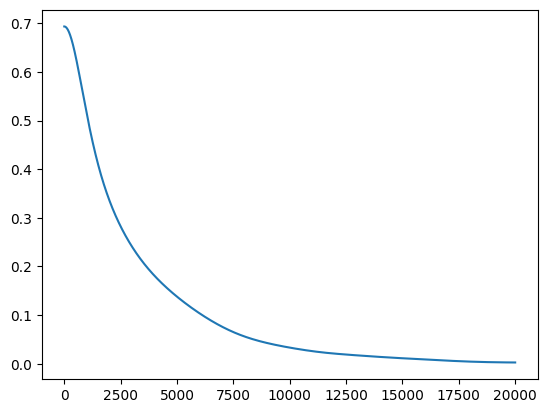

In [8]:
import matplotlib.pyplot as plt
numpy_list = [tensor.detach().numpy().tolist() for tensor in loss_list]
print(numpy_list)

plt.plot(np.arange(num_epochs),numpy_list )